In [1]:
import pickle
import numpy
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
from datetime import datetime

In [2]:
with open('rt_matrix_contrast_512_1012_21_34.pkl', 'rb') as f:
    data = pickle.load(f)
    

In [3]:
def get_decision_time(pop_rate, threshold=25):
    rate_A = pop_rate['pop_rate_a']
    rate_B = pop_rate['pop_rate_b']
    
    above_thre_A = (pop_rate['pop_rate_a'] > threshold)
    idx_over_threshold_A = numpy.where(above_thre_A==True)


    above_thre_B = (pop_rate['pop_rate_b'] > threshold)
    idx_over_threshold_B = numpy.where(above_thre_B==True)

    # monitor each firing rate at every moment 
    decision_time_A = 0

    decision_time_B = 0

    for i in range(len(above_thre_A)):

        # find the time when the divergen starts happening

        above_thre_A = (rate_A > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (rate_B > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)



    if len(idx_over_threshold_A[0]) > 0:
        decision_time_A = idx_over_threshold_A[0][0];
        
    else: 
        pass

    if len(idx_over_threshold_B[0]) > 0:
        decision_time_B = idx_over_threshold_B[0][0];

    else: 
        pass
    

    #print(decision_time_A, decision_time_B)
    return decision_time_A, decision_time_B

In [4]:
def plot_rate(pop_rate):
    rate_a = pop_rate['pop_rate_a']
    rate_b = pop_rate['pop_rate_b']
    time = pop_rate['time']
    plt.rcParams['font.size'] = 18
    
    
    plt.plot(time, rate_a,  linewidth= 2.5)
    plt.plot(time, rate_b, linewidth= 2.5)
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.legend(['Population A', 'Population B'])
    plt.show()

In [5]:
def get_rt_session(data):

    def get_decision_time(pop_rate, threshold=25):
        rate_A = pop_rate['pop_rate_a']
        rate_B = pop_rate['pop_rate_b']
        
        above_thre_A = (pop_rate['pop_rate_a'] > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (pop_rate['pop_rate_b'] > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)

        # monitor each firing rate at every moment 
        decision_time_A = 0

        decision_time_B = 0

        for i in range(len(above_thre_A)):

            # find the time when the divergen starts happening

            above_thre_A = (rate_A > threshold)
            idx_over_threshold_A = numpy.where(above_thre_A==True)


            above_thre_B = (rate_B > threshold)
            idx_over_threshold_B = numpy.where(above_thre_B==True)



        if len(idx_over_threshold_A[0]) > 0:
            decision_time_A = idx_over_threshold_A[0][0];
            
        else: 
            pass

        if len(idx_over_threshold_B[0]) > 0:
            decision_time_B = idx_over_threshold_B[0][0];

        else: 
            pass
    

        #print(decision_time_A, decision_time_B)
        return decision_time_A, decision_time_B


    decision_times = []
    rt = []

    for i in range(len(data)):
        
        decision_time = get_decision_time(data[i])
        
        decision_times.append(decision_time)
        rt.append(max(decision_time))

    rt = [x for x in rt if x != 0]

    #rt.remove(0)
    #print(rt)

    if len(rt) == 0:
        mean_rt_in_realtime = 0

    else:

        rt_in_realtime = numpy.array(rt) - 1000
        rt_in_realtime = rt_in_realtime/10
        mean_rt_in_realtime = rt_in_realtime.mean()



    return mean_rt_in_realtime

In [6]:
keys_list = list(data.keys())


In [7]:
data_in_use = data[keys_list[3]]


In [8]:
decision_times = []
rt = []

for i in range(len(data_in_use)):
    
    decision_time = get_decision_time(data_in_use[i])
    
    decision_times.append(decision_time)
    rt.append(max(decision_time))
      

In [9]:
rt

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
get_rt_session(data_in_use)


0

In [11]:
keysList = list(data.keys())


In [12]:
rt_times_8_by_8 = {}


In [13]:
for i in range(len(keysList)):
    
    rt_times_8_by_8[keysList[i]] =  get_rt_session(data[keysList[i]])

In [14]:
with open('20221110_rt_times_8_by_8.pickle', 'wb') as handle:
    pickle.dump(rt_times_8_by_8, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
    
    
    

In [15]:
rt_times_8_by_8


{(1.5, -70.0): 601.55,
 (1.5, -71.5): 394.5,
 (1.5, -73.0): 0,
 (1.5, -74.5): 0,
 (1.5, -76.0): 0,
 (1.5, -77.5): 0,
 (1.5, -79.0): 0,
 (1.5, -80.5): 0,
 (1.6, -70.0): 445.18,
 (1.6, -71.5): 395.575,
 (1.6, -73.0): 463.0,
 (1.6, -74.5): 0,
 (1.6, -76.0): 0,
 (1.6, -77.5): 0,
 (1.6, -79.0): 0,
 (1.6, -80.5): 0,
 (1.7000000000000002, -70.0): 365.93999999999994,
 (1.7000000000000002, -71.5): 368.49000000000007,
 (1.7000000000000002, -73.0): 371.9,
 (1.7000000000000002, -74.5): 535.72,
 (1.7000000000000002, -76.0): 548.2333333333332,
 (1.7000000000000002, -77.5): 0,
 (1.7000000000000002, -79.0): 0,
 (1.7000000000000002, -80.5): 0,
 (1.8000000000000003, -70.0): 211.06,
 (1.8000000000000003, -71.5): 310.49,
 (1.8000000000000003, -73.0): 287.48999999999995,
 (1.8000000000000003, -74.5): 362.30999999999995,
 (1.8000000000000003, -76.0): 391.25,
 (1.8000000000000003, -77.5): 554.1857142857143,
 (1.8000000000000003, -79.0): 536.7,
 (1.8000000000000003, -80.5): 0,
 (1.9000000000000004, -70.0): 22

In [16]:
curDT = datetime.now()
time = curDT.strftime("%m%d_%H_%M")

with open('64_reaction_times' + time + '.pkl', 'wb') as f:
    pickle.dump(pop_rate_list, f)

NameError: name 'pop_rate_list' is not defined

In [17]:
data[keysList[0]]


[{'time': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.1997e+03, 1.1998e+03,
         1.1999e+03]),
  'pop_rate_a': array([0.58530875, 0.58530875, 0.58530875, ..., 4.09716125, 4.09716125,
         4.09716125]),
  'pop_rate_b': array([1.1706175 , 1.1706175 , 1.1706175 , ..., 2.92654375, 2.92654375,
         2.92654375])},
 {'time': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.1997e+03, 1.1998e+03,
         1.1999e+03]),
  'pop_rate_a': array([0.      , 0.      , 0.      , ..., 7.023705, 7.023705, 7.023705]),
  'pop_rate_b': array([0.58530875, 0.58530875, 0.58530875, ..., 1.75592625, 1.75592625,
         1.75592625])},
 {'time': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.1997e+03, 1.1998e+03,
         1.1999e+03]),
  'pop_rate_a': array([0.58530875, 0.58530875, 0.58530875, ..., 2.341235  , 2.341235  ,
         2.341235  ]),
  'pop_rate_b': array([0.        , 0.        , 0.        , ..., 0.58530875, 0.58530875,
         0.58530875])},
 {'time': array([0.0000e+00, 1.0000e-

In [19]:
import pandas as pd


In [20]:
s = pd.Series(rt_times_8_by_8, index=pd.MultiIndex.from_tuples(rt_times_8_by_8))


In [23]:
s

1.5  -70.0    601.55
     -71.5    394.50
     -73.0      0.00
     -74.5      0.00
     -76.0      0.00
               ...  
2.2  -74.5    158.94
     -76.0    154.00
     -77.5    219.21
     -79.0    199.14
     -80.5    283.94
Length: 64, dtype: float64

In [21]:
df = s.unstack()


In [22]:
df

,-80.5,-79.0,-77.5,-76.0,-74.5,-73.0,-71.5,-70.0
1.5,0.000,0.00,0.000000,0.000000,0.00,0.00,394.500,601.55
1.6,0.000,0.00,0.000000,0.000000,0.00,463.00,395.575,445.18
1.7,0.000,0.00,0.000000,548.233333,535.72,371.90,368.490,365.94
1.8,0.000,536.70,554.185714,391.250000,362.31,287.49,310.490,211.06
1.9,641.075,499.20,353.220000,320.590000,284.12,212.41,184.000,227.65
2.0,484.470,406.92,265.230000,252.590000,226.43,222.02,234.500,170.65
2.1,329.620,303.17,233.240000,230.800000,183.41,208.07,159.450,111.07
2.2,283.940,199.14,219.210000,154.000000,158.94,140.71,117.820,107.54


In [25]:
import seaborn as sns


<AxesSubplot: >

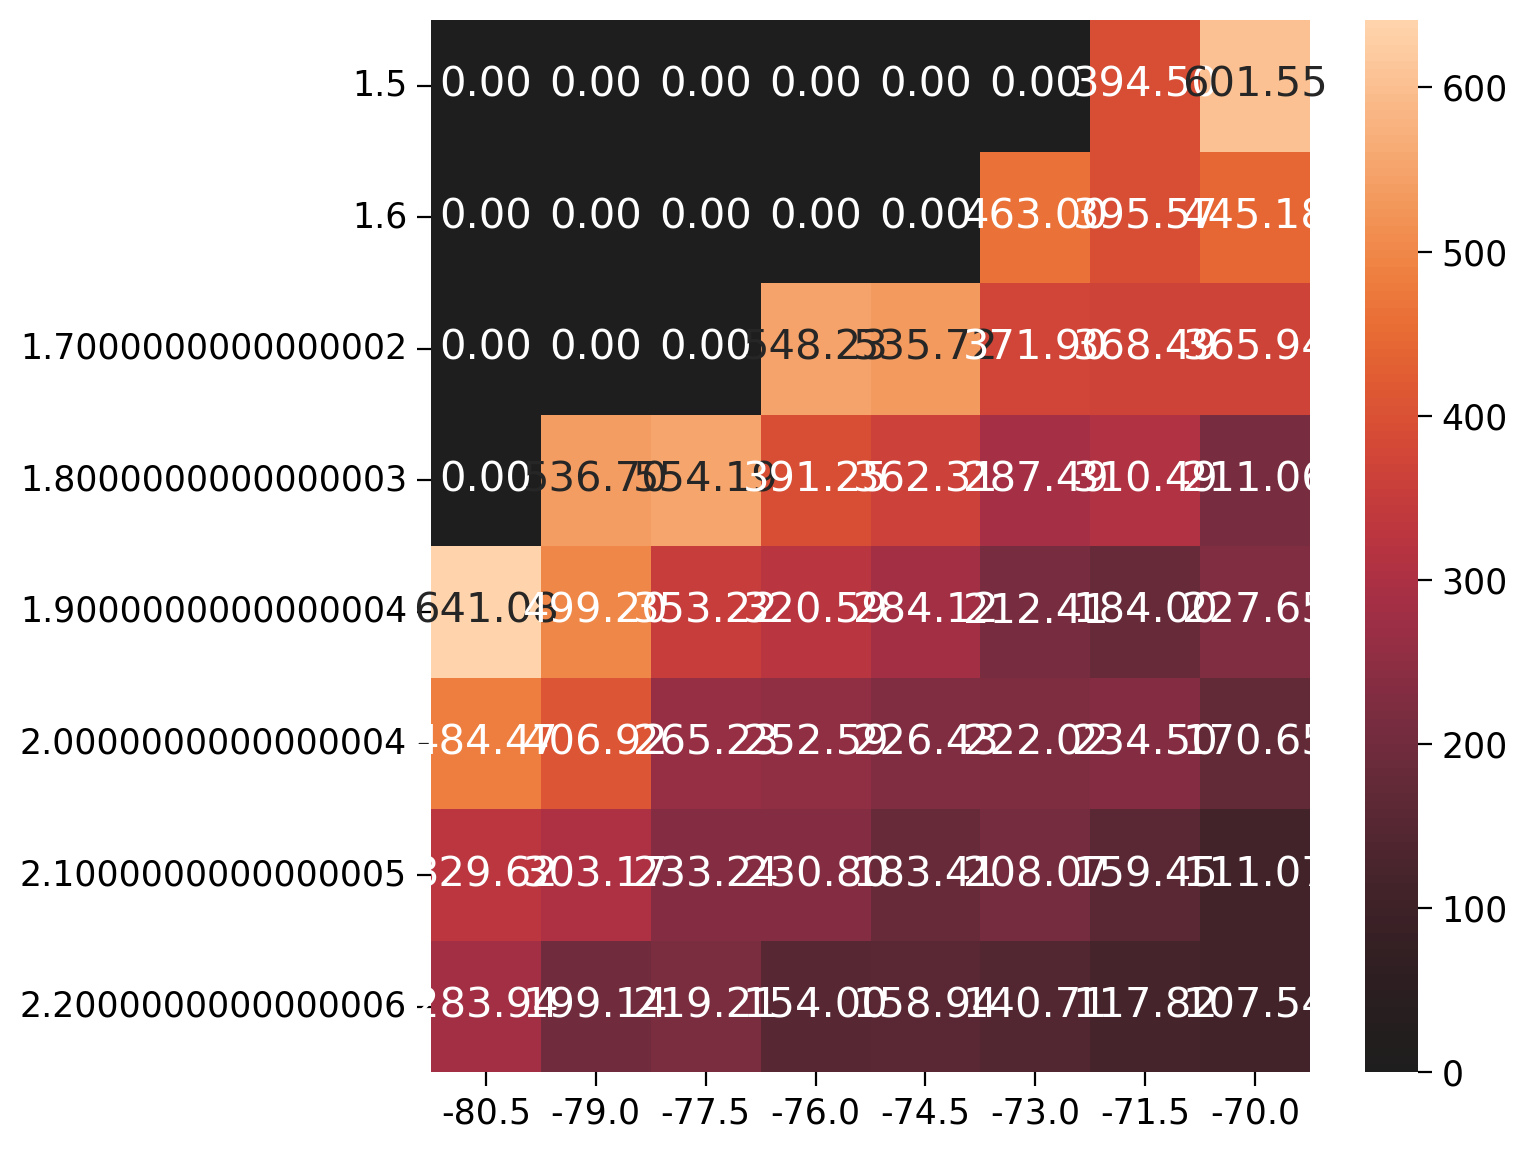

In [27]:
sns.heatmap(df, annot=True, fmt='.2f', center=0)


In [28]:
ytick_values = numpy.arange(1.5,2.2, 0.1)


In [29]:
df.index =  ytick


NameError: name 'ytick' is not defined

In [30]:
ytick_2 = numpy.round(ytick_values,2)


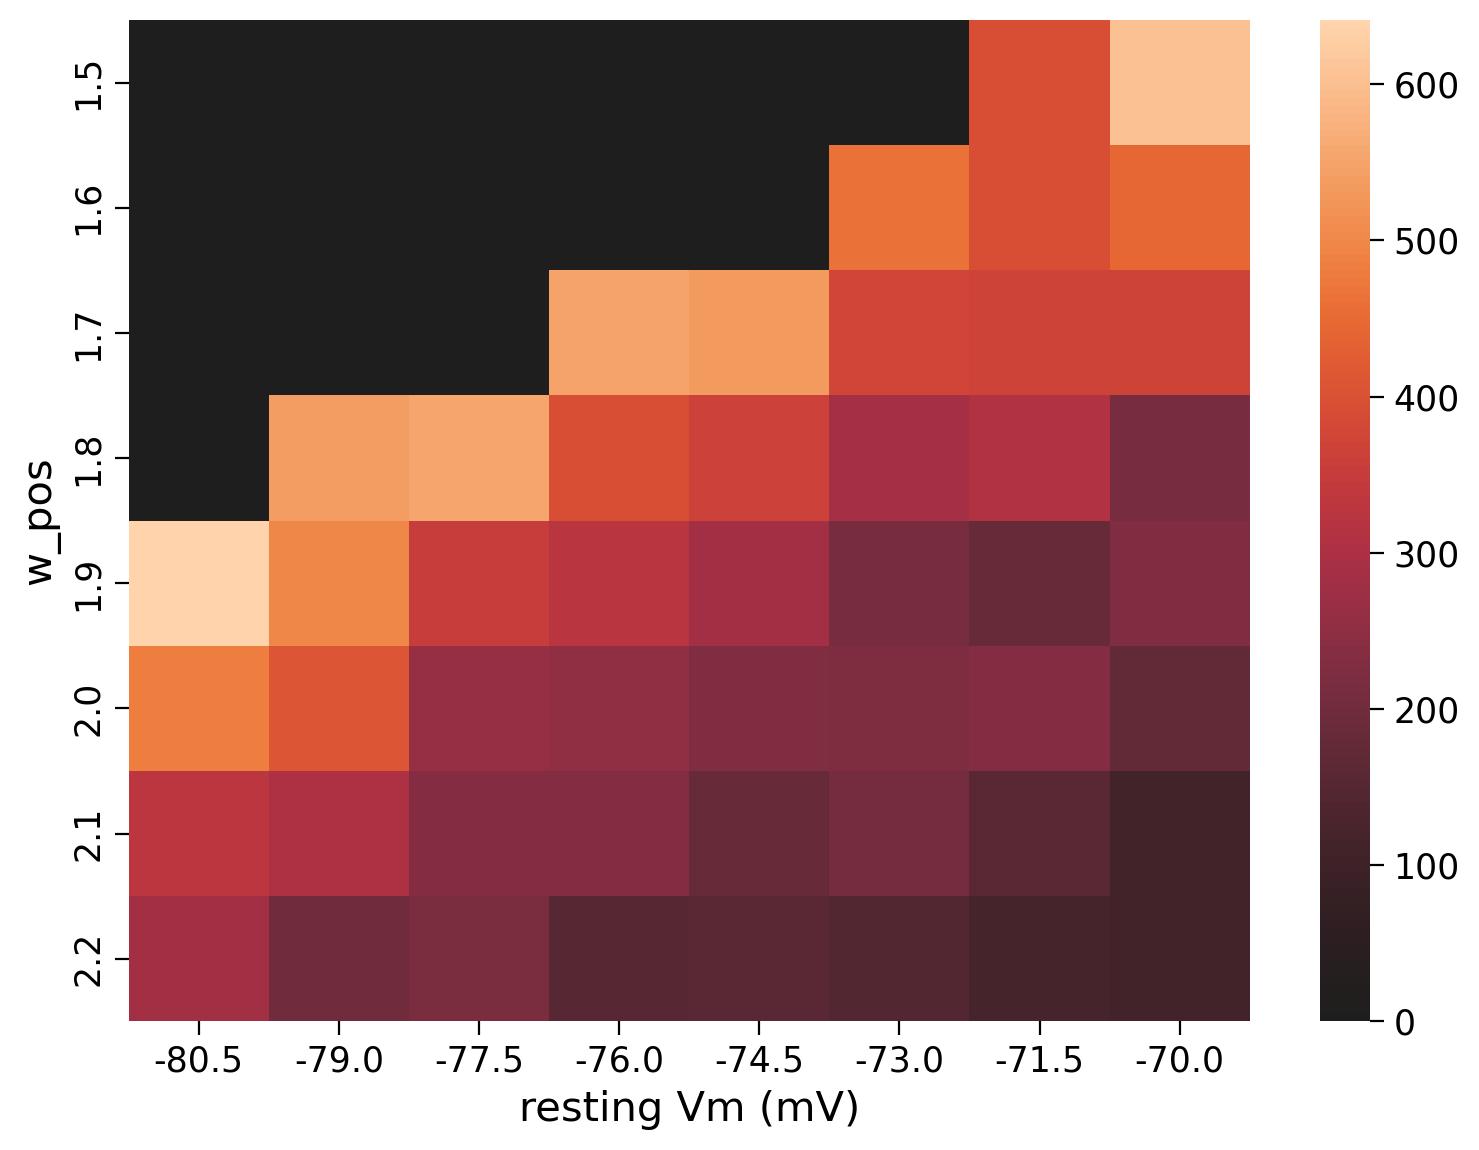

In [31]:
ax = sns.heatmap(df, annot=False,  yticklabels=ytick_2, fmt='.2f', center=0)

#ax.set_yticks(ytick)

ax.set(ylabel='w_pos', xlabel='resting Vm (mV)')



plt.show()